# Preporuka filmova pomoću sadržajno baziranog filtriranja




## Movie Lens set podataka
Jedna od najčešćih setova podataka koja je dostupna na internetu za izgradnju Recommender sustava je [MovieLens DataSet](https://grouplens.org/datasets/movielens/). Ova verzija seta podataka s kojom radim ([1M](https://grouplens.org/datasets/movielens/1m/)) sadrži 1.000.209 anonimnih ocjena od približno 3.900 filmova koje je napravilo 6.040 filmskih korisnika koji su se pridružili MovieLensu 2000. godine.

Podaci su prikupljeni od strane istraživača GroupLens-a tijekom različitih vremenskih perioda, ovisno o veličini seta. Ova 1M verzija izdana je u veljači 2003. Korisnici su slučajno odabrani. Svi odabrani korisnici ocijenili su najmanje 20 filmova. Svaki je korisnik predstavljen ID-om.

Prvobitni MovieLens podaci su sadržani u **movies.dat**, **ratings.dat** i **users.dat** datotekama. Da bismo olakšali rad s podacima, pretvorio sam ih u csv datoteke. Ovaj proces je prikazan u mom drugom **jupyter notebook-u** pod nazivom **Procesiranje podataka**, koje možete pronaći na mom [github-u](https://github.com/lukamaric996/Recommended-System-MovieLens-Data/blob/master/Procesiranje_podataka.ipynb).

## Pripremanje podataka
Idemo učitati podatke pomoću Python-a. Pomoću biblioteke pandas učitati ćemo ih u **ratings**, **users**, and **movies**. Proslijediti ću kolone da ih možemo lakše isčitavati pomoću pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Čitanje datoteke s ocjenama
# Brisanje timestamp kolone
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Čitanje datoteke s korisnicima
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Čitanje datoteke s filmovima
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])


Pogledajmo sada sadržaj svake datoteke kako bismo ih bolje razumjeli.

### Ocjene - set podataka

In [2]:
# Provjeravanje prvih 5 redova
print(ratings.head())

   user_id  movie_id  rating
0        1      1193       5
1        1       661       3
2        1       914       3
3        1      3408       4
4        1      2355       5


In [3]:
# Provjeravanje informacija za set
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB
None


Ovo potvrđuje da se radi o 1 milionu ocjena za različite kombinacije korisnika i filmova.

### Korisnici - set podataka

In [4]:
# Provjeravanje prvih 5 redova
print(users.head())

   user_id gender zipcode  age_desc              occ_desc
0        1      F   48067  Under 18          K-12 student
1        2      M   70072       56+         self-employed
2        3      M   55117     25-34             scientist
3        4      M   02460     45-49  executive/managerial
4        5      M   55455     25-34                writer


In [5]:
# Provjeravanje informacija za set
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id     6040 non-null int64
gender      6040 non-null object
zipcode     6040 non-null object
age_desc    6040 non-null object
occ_desc    6040 non-null object
dtypes: int64(1), object(4)
memory usage: 236.0+ KB
None


To potvrđuje da ima 6040 korisnika i imamo 5 značajki za svakog korisnika (jedinstveni ID korisnika, spol, dob, zanimanje i poštanski broj gdje žive).

### Filmovi - set podataka

In [6]:
# Provjeravanje prvih 5 redova
print(movies.head())

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


In [7]:
# Provjeravanje informacija za set
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


Ovaj set podataka sadrži atribute 3883 filmova. Postoje 3 stupca, uključujući ID filma, njihove naslove i žanrove. Žanrovi su odijeljeni pomoću **|** i izabrano je 18 žanrova (akcija, avantura, animacija, dječji, komedija, krimi, dokumentarni, drama, fantayija, film noir, horor, glazbeni, western).

## Istraživanje podataka

### Ocjene


In [8]:
# Statistički opis podataka te suma
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

C:\Users\Lumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


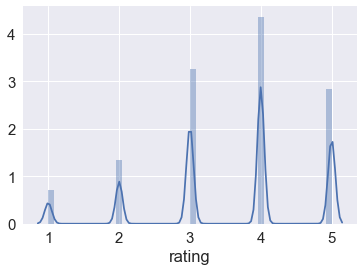

In [9]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

Čini se da su korisnici prilično velikodušni u svojim ocjenama. Prosječna ocjena iznosi 3,58 na skali od 5. Pola filmova ima ocjenu 4 i 5. Osobno mislim da ocjena 5 nije bila dobar pokazatelj jer bi ljudi mogli imati različite stilove ocjenjivanja (tj. Osoba A mogla bi uvijek koristiti 4 za prosječan film, dok osoba B daje samo 4 za svoje favorite). Svaki je korisnik ocijenio najmanje 20 filmova, pa sumnjam da bi distribucija mogla biti uzrokovana samo slučajnom razlikom u kvaliteti filmova.

Pogledajmo i podskup od 20 filmova s najvišom ocjenom.

In [10]:
# Spajanje sve 3 csv datoteke u jedan dataframe
dataset = pd.merge(pd.merge(movies, ratings),users)
# Prikazivanje 20 filmova sa najvišom ocjenom
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


### Žanrovi
Varijabla žanrova zasigurno će biti važna pri izradi preporuka jer opisuje sadržaj filma (tj. Animacija, Horror, Sci-Fi). Osnovna pretpostavka je da filmovi u istom žanru trebaju imati slične sadržaje. Pokušat ću vidjeti točno koji su žanrovi najpopularniji.

In [11]:
# Popis ključnih riječi žanra
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Funkcija koja broji koliko puta se pojavljuju sve ključne riječi žanra
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # pretvoriti rječnik u popis kako bismo sortirali ključne riječi prema učestalosti
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Pozivanje ove funkcije omogućuje pristup popisu ključnih riječi žanrova koje su sortirane smanjenjem učestalosti
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

Top 5 žanrova u opadajućem nizu su: drama, komedija, akcija, triler i romantika.

## Vrste sustava preporuke

### 1. Sadržajno bazirani
Preporuka temeljena na sadržaju oslanja se na sličnost preporučenih stavki. Osnovna ideja je da ako vam se sviđa jedna stavka, tada će vam se svidjeti i "slična" stavka. Obično funkcionira dobro kada je lako odrediti kontekst / svojstva svake stavke.

Sadržaj temeljen na sadržaju funkcionira s podacima koje korisnik pruža, bilo izričito ocjena filmova za MovieLens skup podataka. Na temelju tih podataka generira se korisnički profil koji se zatim koristi za davanje prijedloga korisniku. Kako korisnik daje više ulaza ili poduzima akcije na preporukama, sustav postaje sve precizniji za datog korisnika.
### 2. Kolaborativno filtriranje
Kolaborativno filtriranje u potpunosti se temelji na prošlom ponašanju, a ne o sadržaju. Točnije, temelji se na sličnosti u preferencijama, ukusima i izborima dvaju korisnika. Analizira kako je sličan ukus jednog korisnika na drugome i daje preporuke na temelju toga.

Na primjer, ako korisnik A voli filmove 1, 2, 3 i korisnik B voli filmove 2,3,4, onda imaju slične interese i A bi trebao film 4 i B bi trebao film 1. To ga čini jednim od najčešće korištenih algoritama jer ne ovisi o bilo kakvim dodatnim informacijama.

Općenito, kolaborativno filtriranje je onaj dio sustava preporuke koji obavlja najviše posla. Algoritam ima vrlo zanimljivu karakteristiku mogućnosti samostalnog učenja značajki, što znači da može početi samostalno učiti koje značajke koristiti. Može se podijeliti na **kolaborativno filtriranje na temelju memorije** i **kolaborativno filtriranje na temelju modela**.

U ovom projektu ću obraditi sadržajno bazirani sustav preporuke.

## Sadržajno bazirani sustav preporuke
### Teorija
Koncepti **Term Frequency (TF)** i **Inverse (IDF)** upotrebljavaju se u sustavima prikupljanja podataka i mehanizmima filtriranja temeljenih na sadržaju (kao što je preporučitelj temeljen na sadržaju). Koriste se za određivanje relativne važnosti dokumenta / članka / vijesti / filma itd.


TF je jednostavno učestalost riječi u dokumentu. IDF je inverzna učestalost dokumenta u cijelom dokumentu. 
TF-IDF se uglavnom koristi zbog dva razloga: Pretpostavimo da tražimo "**rezultate najnovijih europskih nogometnih utakmica**" na Googleu. Sigurno je da će "**i/je**" biti češće nego "**nogomet/nogometnih**", ali relativna važnost **nogomet** je veća od točke gledišta upita za pretraživanje. U takvim slučajevima, TF-IDF-a negira učinak visokofrekventnih riječi u određivanju važnosti neke stavke (dokumenta).

Ispod je jednadžba za izračun TF-IDF :
![tfidf](images/tfidf.jpg)

Nakon izračuna rezultata TF-IDF-a, kako odrediti koje su stavke bliže jedna drugoj, a koje bliže korisničkom profilu? To se postiže pomoću **Vector Space Module** koji izračunava blizinu temeljenu na kutu između vektora. U ovom se modelu svaka stavka pohranjuje kao vektor njezinih atributa (koji su također vektori) u **n-dimenzionalnom prostoru**, a kutovi između vektora se izračunavaju kako bi **odredili sličnost između vektora**. Nadalje, vektori korisničkih profila također su stvoreni na temelju njegovih akcija na prethodnim atributima predmeta, a sličnost između stavke i korisnika također je određena na sličan način.

![vector-space](images/vector_space.png)

Rečenica 2 ima veću vjerojatnost da koristi termin 2 nego što koristi termin 1. Suprotno od rečenice 1. metoda izračuna ove relativne mjere izračunava se uzimanjem kosinusnog kuta između rečenica i uvjeta. Krajnji razlog korištenja kosinusa je da **vrijednost kosinusa raste sa smanjenom vrijednošću kuta** između koje označava više sličnosti. Vektori su normalizirani po duljini, nakon čega postaju vektori duljine 1, a zatim je izračun kosinusa jednostavno zbrajanje produkt vektora.

### Implementacija

Uz svu tu teoriju, gradit ću sustav s preporukom na temelju sadržaja koji izračunava sličnost između filmova temeljenih na filmskim žanrovima. Predložit će filmove koji su najsličniji određenom filmu temeljenom na njegovu žanru. Da bih to učinio, upotrijebit ću datoteku **movies.csv**.

In [12]:
# Razdvojiti veliki string žanrova u niz stringova
movies['genres'] = movies['genres'].str.split('|')
# Prebaciti žanrove u string vrijednosti
movies['genres'] = movies['genres'].fillna("").astype('str')

Nemam kvantitativni mjerni podatak kako bismo prosudili učinkovitost našeg stroja pa će to morati biti kvalitativno učinjeno. Da bismo to učinili, koristit ću **TfidfVectorizer** funkciju **scikit-learn**, koja pretvara tekst u značajke vektora koji se mogu koristiti kao argument pri procjeni.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

Koristit ću **[Cosine Similarity](https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html)** za izračunavanje numeričke količine koja označava sličnost između dva filma. Budući da smo koristili TF-IDF Vectorizer, izračunavanje Dot proizvoda izravno će nam dati kosinsku sličnost. Stoga ćemo koristiti sklearn **linear_kernel** umjesto cosine_similarities jer je mnogo brži.

In [14]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

Sada imam  matricu parova kosinusni sličnosti za sve filmove u setu podataka. Sljedeći je korak napisati funkciju koja vraća 20 najsličnijih filmova temeljenih na rezultatima sličnosti kosinusa.

In [15]:
# Gradnja 1-dimenzionalnog niza s naslovima filmova
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Funkcija koja daje preporuke za filmove temeljene na kosinusovim sličnostima filmskih žanrova
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

Pokušajmo dobiti vrhunske preporuke za nekoliko filmova i vidjeti kako su dobre preporuke.

In [16]:
genre_recommendations("Full Metal Jacket (1987)").head(20)

461            Heaven & Earth (1993)
1204        Full Metal Jacket (1987)
1214     Boat, The (Das Boot) (1981)
1222                    Glory (1989)
1545                G.I. Jane (1997)
1959      Saving Private Ryan (1998)
2358       Thin Red Line, The (1998)
2993         Longest Day, The (1962)
3559            Flying Tigers (1942)
3574    Fighting Seabees, The (1944)
3585    Guns of Navarone, The (1961)
3684             Patriot, The (2000)
40                Richard III (1995)
153            Beyond Rangoon (1995)
332         Walking Dead, The (1995)
523          Schindler's List (1993)
641        Courage Under Fire (1996)
967          Nothing Personal (1995)
979           Michael Collins (1996)
1074                  Platoon (1986)
Name: title, dtype: object

In [17]:
genre_recommendations("Heat (1995)").head(20)

168                      Hackers (1995)
2209                       Ronin (1998)
2887    Someone to Watch Over Me (1987)
3694                         F/X (1986)
3695                       F/X 2 (1992)
46                 Seven (Se7en) (1995)
49           Usual Suspects, The (1995)
517            Romeo Is Bleeding (1993)
653                  Purple Noon (1960)
1073              Reservoir Dogs (1992)
1331            Albino Alligator (1996)
1444            City of Industry (1997)
1601                 Playing God (1997)
1629                   Incognito (1997)
1640                  Red Corner (1997)
2140          Young and Innocent (1937)
2322              Simple Plan, A (1998)
2492                  True Crime (1999)
2536                  Entrapment (1999)
2848                   Body Heat (1981)
Name: title, dtype: object

In [18]:
genre_recommendations('Good Will Hunting (1997)').head(20)

25                                        Othello (1995)
26                                   Now and Then (1995)
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                                Dangerous Minds (1995)
35                               Dead Man Walking (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
52                                       Lamerica (1994)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
77                            Crossing Guard, The (1995)
79          White Balloon, The (Badkonake Sefid ) (1995)
81                       Antonia's Line (Antonia) (1995)
82       Once Upon a Time... When We Were Colored (1995)
89                    Journey of August King, The (1995)
92                             

Kao što vidite, imam dosta pristojan popis preporuka za **Full Metal Jacket**, **Heat** i **Good Will Hunting**.

Ovdje su pozitivne stvari kod sadržajno bazirane preporuke:
* Nema potrebe za podacima o drugim korisnicima, stoga nema problema s hladnim pokretanjem.
* Može preporučiti korisnicima s jedinstvenim ukusima.
* Može preporučiti nove i nepopularne stavke.
* Može pružiti objašnjenja za preporučene stavke unosom sadržajnih značajki koje su uzrokovale preporučivanje stavke (u ovom slučaju žanrova)

Međutim, postoje neki nedostaci korištenja ovog pristupa:
* Pronalaženje odgovarajućih značajki je teško.
* Ne preporučuje stavke izvan profila sadržaja korisnika.
* Nije moguće iskoristiti kvalitetne prosudbe drugih korisnika.

## Zaključak
U ovom notebook-u predstavio sam MovieLens set podataka za izgradnju sustava za preporuke filmova.

Razvio sam modele preporuka, uključujući:

* Kako učitati i pregledati podatke.
* Kako razviti sadržajno temeljen model temeljen na žanrovima filma.